# Introduction to Artificial Neural Networks with Keras

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Perceptrons

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

In [5]:
per_clf.coef_

array([[-1.4, -2.2]])

In [6]:
per_clf.intercept_

array([4.])

In [7]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

lims = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(lims[0], lims[1], 500).reshape(-1, 1),
        np.linspace(lims[2], lims[3], 200).reshape(-1, 1),
    )
    
x0.shape

(200, 500)

In [8]:
X_new = np.c_[x0.flatten(), x1.flatten()]
X_new

array([[0.        , 0.        ],
       [0.01002004, 0.        ],
       [0.02004008, 0.        ],
       ...,
       [4.97995992, 2.        ],
       [4.98997996, 2.        ],
       [5.        , 2.        ]])

In [9]:
y_predict = per_clf.predict(X_new)
y_predict

array([1, 1, 1, ..., 0, 0, 0])

In [10]:
zz = y_predict.reshape(x0.shape)
zz

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
from matplotlib.colors import ListedColormap

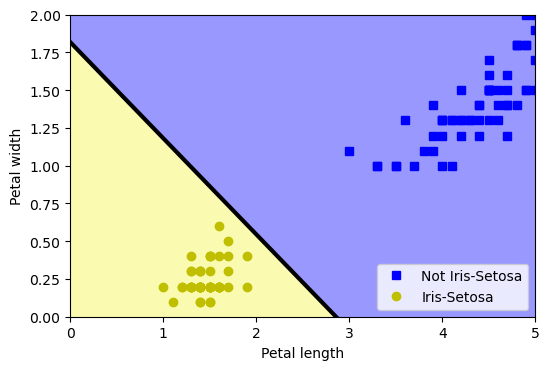

In [12]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris-Setosa")
ax.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris-Setosa")

ax.plot([lims[0], lims[1]], [a * lims[0] + b, a * lims[1] + b],
        "k-",
        lw=3)

custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

ax.contourf(x0, x1, zz, cmap=custom_cmap)
ax.set(xlabel="Petal length", ylabel="Petal width")
ax.legend(loc="lower right")
ax.axis(lims)
plt.show()

# Activation functions

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

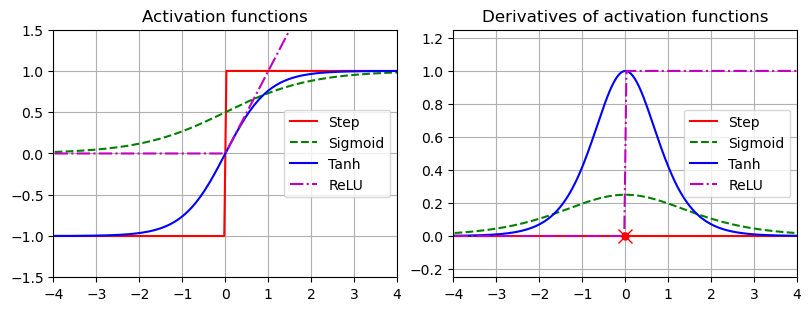

In [14]:
z = np.linspace(-5, 5, 200)

_, axes = plt.subplots(1,
                       2,
                       figsize=(8, 3),
                       dpi=100,
                       sharex=True,
                       constrained_layout=True)

funcs = [np.sign, sigmoid, np.tanh, relu]
styles = ["r-", "g--", "b-", "m-."]
labels = ["Step", "Sigmoid", "Tanh", "ReLU"]

for func, style, label in zip(funcs, styles, labels):
    axes[0].plot(z, func(z), style, label=label)
    axes[1].plot(z, derivative(func, z), style, label=label)

titles = ["Activation functions", "Derivatives of activation functions"]
limss = [[-4, 4, -1.5, 1.5], [-4, 4, -.25, 1.25]]

for title, lims, ax in zip(titles, limss, axes.flatten()):
    ax.axis(lims)
    ax.set(title=title)
    ax.grid(1)
    ax.legend(loc="center right")

axes[1].plot(0, 0, "ro", markersize=5)
axes[1].plot(0, 0, "rx", markersize=10)
plt.show()

In [15]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)


def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) -
                      0.5)

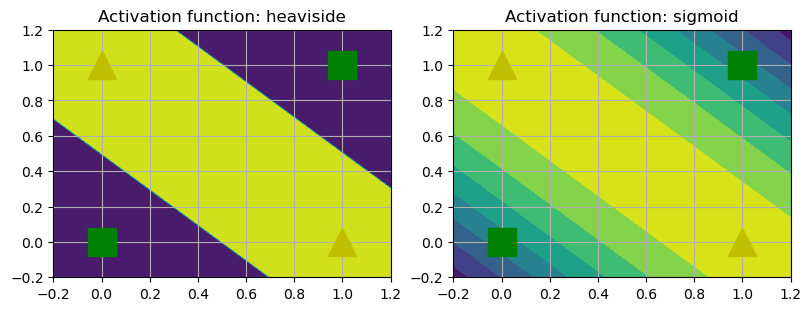

In [16]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

_, axes = plt.subplots(1, 2, figsize=(8, 3), dpi=100, constrained_layout=True)

z = [z1, z2]
funcs = ['heaviside', 'sigmoid']

for ind, ax in enumerate(axes):
    ax.contourf(x1, x2, z[ind])
    ax.plot([0, 1], [0, 1], "gs", ms=20)
    ax.plot([0, 1], [1, 0], "y^", ms=20)
    ax.set(title=f"Activation function: {funcs[ind]}")
    ax.grid(1)

# Building an Image Classifier

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [19]:
X_train_full.shape

(60000, 28, 28)

In [20]:
X_train_full.dtype

dtype('uint8')

In [21]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

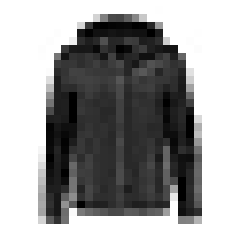

In [22]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [23]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [24]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
    "Sneaker", "Bag", "Ankle boot"
]
class_names[y_train[0]]

'Coat'

In [25]:
X_valid.shape

(5000, 28, 28)

In [26]:
X_test.shape

(10000, 28, 28)

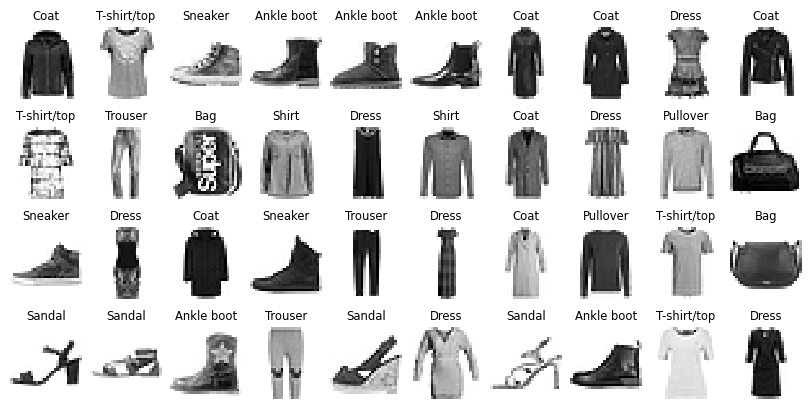

In [27]:
_, axes = plt.subplots(4,
                       10,
                       figsize=(8, 4),
                       dpi=100,
                       constrained_layout=True)

for ind, ax in enumerate(axes.flatten()):

    ax.imshow(X_train[ind], cmap="binary", interpolation="nearest")
    ax.axis('off')
    ax.set_title(class_names[y_train[ind]], fontsize='small')

plt.show()

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2021-09-19 23:56:29.850768: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [31]:
model.layers

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
import pydot
import graphviz

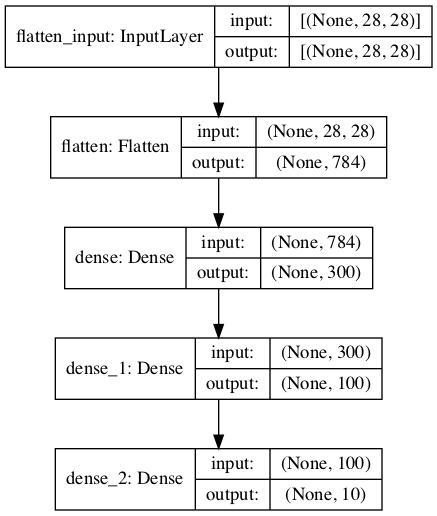

In [34]:
keras.utils.plot_model(model, "data/101/my_fashion_mnist_model.png", show_shapes=True)

In [35]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [36]:
model.get_layer(hidden1.name) is hidden1

True

In [37]:
weights, biases = hidden1.get_weights()

In [38]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [39]:
weights.shape

(784, 300)

In [40]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [41]:
biases.shape

(300,)

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

2021-09-19 23:56:40.320358: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/30
1719/1719 [==============================] - 29s 16ms/step - loss: 1.0188 - accuracy: 0.6805 - val_loss: 0.5218 - val_accuracy: 0.8210
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5028 - accuracy: 0.8260 - val_loss: 0.4354 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 18s 11ms/step - loss: 0.4484 - accuracy: 0.8425 - val_loss: 0.5316 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4207 - accuracy: 0.8525 - val_loss: 0.3914 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4060 - accuracy: 0.8582 - val_loss: 0.3745 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3751 - accuracy: 0.8679 - val_loss: 0.3707 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3649 - accuracy: 0.8710 - val_loss: 0.3630 - val_

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

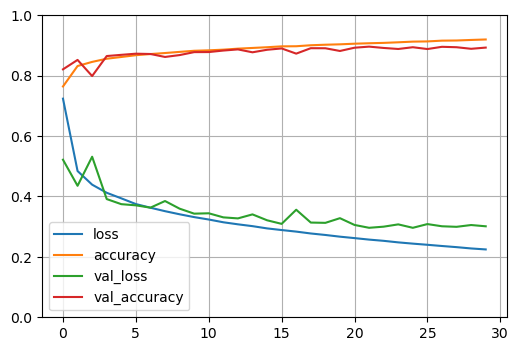

In [ ]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

for i in history.history.keys():
    ax.plot(history.history.get(i), label=i)
    ax.legend()

ax.set(ylim=(0, 1))
ax.grid(1)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3353 - accuracy: 0.8820


[0.3352515995502472, 0.8820000290870667]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
model.predict(X_new)

array([[4.1024000e-06, 4.2761562e-07, 7.7352219e-05, 8.9763398e-06,
        3.7400682e-06, 1.1412925e-02, 7.8980111e-06, 2.8233122e-02,
        7.8887114e-04, 9.5946258e-01],
       [1.1116678e-05, 3.6214793e-08, 9.8210180e-01, 1.5544003e-08,
        1.7581107e-02, 1.9387754e-11, 3.0586790e-04, 1.2198677e-11,
        7.3210291e-09, 3.6714097e-11],
       [2.8578486e-06, 9.9999654e-01, 2.0927594e-08, 4.1734179e-07,
        1.2935442e-07, 1.8845613e-13, 5.0816507e-10, 4.4625967e-13,
        8.3641147e-09, 2.6737662e-12]], dtype=float32)

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

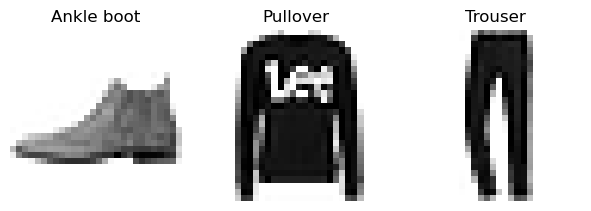

In [ ]:
_, axes = plt.subplots(1, 3, figsize=(6, 2), dpi=100, constrained_layout=True)

for ind, (ax, image) in enumerate(zip(axes.flatten(), X_new)):
    ax.imshow(image, cmap="binary", interpolation="nearest")
    ax.axis('off')
    ax.set(title=class_names[y_test[ind]])

plt.show()

# Regression MLP

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target,
                                                              random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full,
                                                      random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4910 - val_loss: 0.4656

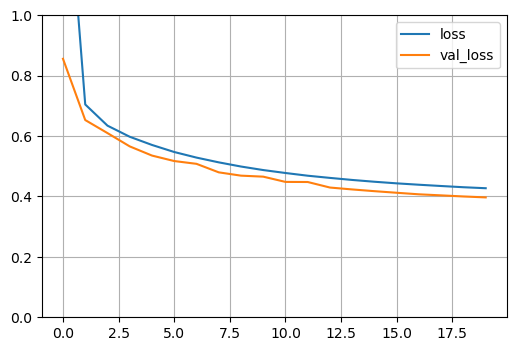

In [ ]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

for i in history.history.keys():
    ax.plot(history.history.get(i), label=i)
    ax.legend()

ax.set(ylim=(0, 1))
ax.grid(1)

In [ ]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022797 ]], dtype=float32)

# Functional API

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [ ]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9731 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7638 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6045 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5862 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5452 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5243 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5185 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4947 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4782 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4708 - val_loss: 0.4313

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B),
                    y_train,
                    epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
                    
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 3.1941 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7247 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6176 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5799 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5409 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5173 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5186 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4977 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4765 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4676 - val_loss: 0.4315

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 3.4633 - main_output_loss: 3.3289 - aux_output_loss: 4.6732 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.9807 - main_output_loss: 0.7503 - aux_output_loss: 3.0537 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7742 - main_output_loss: 0.6290 - aux_output_loss: 2.0810 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6952 - main_output_loss: 0.5897 - aux_output_loss: 1.6449 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6469 - main_output_loss: 0.5508 - aux_output_loss: 1.5118 - val_loss

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 991us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


# The subclassing API

In [ ]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [ ]:
model.compile(loss="mse",
              loss_weights=[0.9, 0.1],
              optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(
    (X_train_A, X_train_B), (y_train, y_train),
    epochs=10,
    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B),
                                                 (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 3.3855 - output_1_loss: 3.3304 - output_2_loss: 3.8821 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0790 - output_1_loss: 0.9329 - output_2_loss: 2.3942 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8644 - output_1_loss: 0.7583 - output_2_loss: 1.8194 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7850 - output_1_loss: 0.6979 - output_2_loss: 1.5689 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7294 - output_1_loss: 0.6499 - output_2_loss: 1.4452 - val_loss: 1.1357 - val_output_1_loss: 0.5964 - val_

# Saving and Restoring

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 796us/step - loss: 0.4382


In [ ]:
path = "data/101/my_keras_model.h5"
# model.save(path)
model = keras.models.load_model(path)

In [ ]:
model.predict(X_new)

array([[0.5400237],
       [1.6505971],
       [3.0098243]], dtype=float32)

In [ ]:
# model.save_weights("data/101/my_keras_weights.ckpt")
model.load_weights("data/101/my_keras_weights.ckpt")

# Using Callbacks during Training

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("data/101/my_keras_model2.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model(
    "data/101/my_keras_model2.h5")  # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 1s 3ms/step - loss: 0.4382


In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4578 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4430 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4376 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4361 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4204 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4112 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4226 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4135 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4039 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4023 - val_lo

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - 1s 2ms/step - loss: 0.3302 - val_loss: 0.3556

val/train: 1.08


# TensorBoard

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [ ]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2021_09_15-16_40_15'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

2021-09-15 16:40:16.040831: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-09-15 16:40:16.040855: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-09-15 16:40:16.043464: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/30
 32/363 [=>............................] - ETA: 2s - loss: 6.6230

2021-09-15 16:40:16.510777: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-09-15 16:40:16.510796: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-09-15 16:40:16.516666: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2021-09-15 16:40:16.528767: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2021-09-15 16:40:16.548736: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_logs/run_2021_09_15-16_40_15/train/plugins/profile/2021_09_15_16_40_16
2021-09-15 16:40:16.550136: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./my_logs/run_2021_09_15-16_40_15/train/plugins/profile/2021_09_15_16_40_16/Xavier-Yang.local.trace.json.gz
2021-09-15 16:40:16.579954: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_logs/run_2

363/363 [==============================] - 1s 3ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4549 - val_loss: 0.4379
Epoch 11/3

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [ ]:
run_logdir2 = get_run_logdir()

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

2021-09-15 16:40:37.443638: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-09-15 16:40:37.443695: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-09-15 16:40:37.443738: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/30
 49/363 [===>..........................] - ETA: 1s - loss: 1.6313

2021-09-15 16:40:38.491509: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-09-15 16:40:38.491591: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-09-15 16:40:38.508847: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2021-09-15 16:40:38.512032: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2021-09-15 16:40:38.514121: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_logs/run_2021_09_15-16_40_37/train/plugins/profile/2021_09_15_16_40_38
2021-09-15 16:40:38.516878: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./my_logs/run_2021_09_15-16_40_37/train/plugins/profile/2021_09_15_16_40_38/Xavier-Yang.local.trace.json.gz
2021-09-15 16:40:38.519447: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_logs/run_2

363/363 [==============================] - 3s 5ms/step - loss: 0.7645 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 8159520618.2209 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 1.3439 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3546 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3513 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3274 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 1.3639 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 1.3487 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3445 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3697 - val_loss: 1.3172

In [ ]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.5673 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3216 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5972 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4985 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4608 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4410 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4463 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4283 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4139 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4107 - val_l

In [ ]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3409


In [ ]:
y_pred = keras_reg.predict(X_new)

In [ ]:
tf.random.set_seed(42)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg,
                                   param_distribs,
                                   n_iter=10,
                                   cv=2,
                                   verbose=2)
rnd_search_cv.fit(X_train,
                  y_train,
                  epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.3827 - val_loss: 0.4703
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4880 - val_loss: 0.4247
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4541 - val_loss: 0.4052
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4518 - val_loss: 0.3975
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4337 - val_loss: 0.3991
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4263 - val_loss: 0.4031
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4385 - val_loss: 0.4043
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4301 - val_loss: 0.3929
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4108 - val_loss: 0.4040
Epoch 10/100
242/242 [========

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x143110370>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.0078...
                                                          0.00502142573

In [ ]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [ ]:
rnd_search_cv.best_score_

-0.32039451599121094

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3029


-0.3028871417045593

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3029


0.3028871417045593

# Exercise solutions

*Exercise: Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.*

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

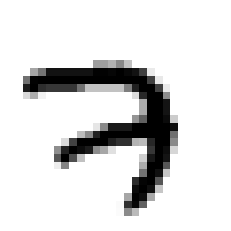

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

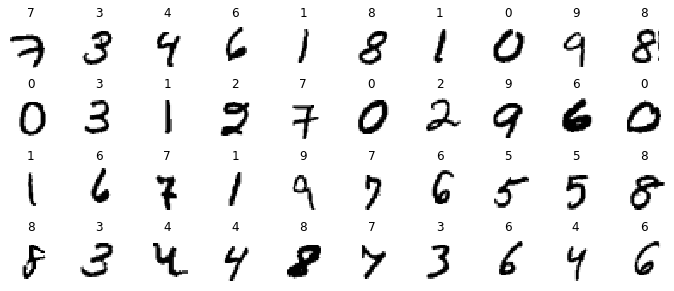

In [ ]:
_, axes = plt.subplots(4,
                       10,
                       figsize=(10, 6),
                       dpi=100,
                       constrained_layout=True)

for ax in axes.flatten():

    ax.imshow(X_train[index], cmap="binary", interpolation="nearest")
    ax.axis('off')
    ax.set(title=y_train[index], fontsize='small')

plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
              
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [ ]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 2s 1ms/step - loss: 4.6604 - accuracy: 0.4887 - val_loss: 2.3911 - val_accuracy: 0.1126


We can now plot the loss as a functionof the learning rate:

Text(0, 0.5, 'Loss')

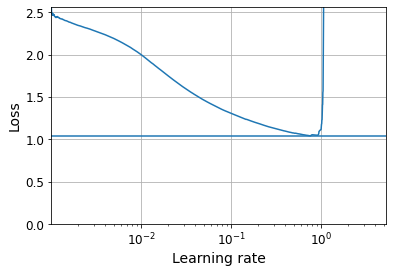

In [ ]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(expon_lr.rates, expon_lr.losses)
ax.set_xscale('log')
ax.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
ax.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
ax.grid(1)
ax.set(xlabel="Learning rate", ylabel="Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=3e-1),
              metrics=["accuracy"])

In [ ]:
run_index = 1
run_logdir = f"data/101/y_mnist_logs/run_{run_index:03d}"
run_logdir

'./my_mnist_logs/run_001'

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("data/101/my_mnist_model3.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4195 - accuracy: 0.8677 - val_loss: 0.0995 - val_accuracy: 0.9724
Epoch 2/100
1719/1719 [==============================] - 2s 882us/step - loss: 0.0941 - accuracy: 0.9698 - val_loss: 0.0913 - val_accuracy: 0.9746
Epoch 3/100
1719/1719 [==============================] - 1s 845us/step - loss: 0.0650 - accuracy: 0.9792 - val_loss: 0.0785 - val_accuracy: 0.9772
Epoch 4/100
1719/1719 [==============================] - 2s 932us/step - loss: 0.0438 - accuracy: 0.9855 - val_loss: 0.0793 - val_accuracy: 0.9784
Epoch 5/100
1719/1719 [==============================] - 1s 832us/step - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.0724 - val_accuracy: 0.9812
Epoch 6/100
1719/1719 [==============================] - 1s 835us/step - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.0814 - val_accuracy: 0.9792
Epoch 7/100
1719/1719 [==============================] - 1s 868us/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0

In [ ]:
model = keras.models.load_model("data/101/my_mnist_model3.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 701us/step - loss: 0.0804 - accuracy: 0.9806


[0.08043695986270905, 0.9805999994277954]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [ ]:
%tensorboard --logdir=./my_mnist_logs --port=6006